In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras


In [3]:
# This takes train and test dataset 'fashion_mnist' from tfds
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
# Let's get some info about the dataset
train_images.shape

(60000, 28, 28)

In [5]:
train_ds = tfds.load('fashion_mnist', split = 'train')
example_one = train_ds.take(1)

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incompleteRW5C64/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incompleteRW5C64/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.0. Subsequent calls will reuse this data.


In [6]:
#The label is a scalar. So, lets check the value of label for first example

for data in example_one:
  print(data['label'])

tf.Tensor(2, shape=(), dtype=int64)


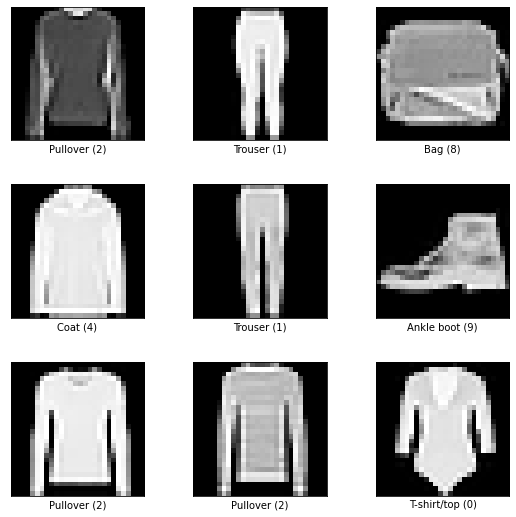

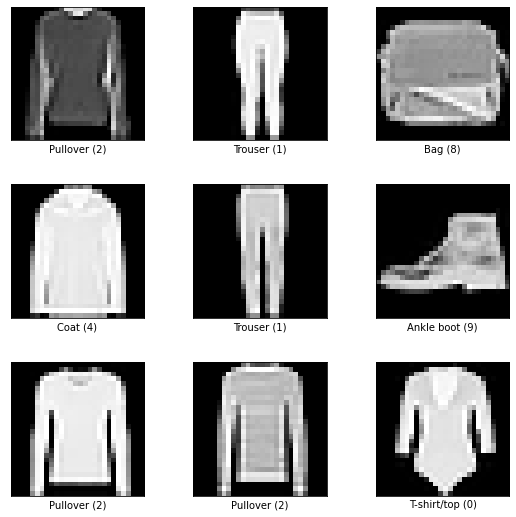

In [8]:
# lets visualize the data

dataset, info = tfds.load('fashion_mnist', split = 'train', with_info=True)
tfds.show_examples(info, dataset)

In [ ]:
# Let's make a model using linear layers (keras) to train the data

from tensorflow.keras import layers

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(10)
])

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [32]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3400 - accuracy: 0.8804
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3307 - accuracy: 0.8843
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3263 - accuracy: 0.8849
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3300 - accuracy: 0.8849
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3178 - accuracy: 0.8887
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3204 - accuracy: 0.8877
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3195 - accuracy: 0.8873
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3172 - accuracy: 0.8887
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3108 - accuracy: 0.8900
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.308

In [33]:
test_loss, test_acc = model.evaluate(test_images,  test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.4751 - accuracy: 0.8634


In [34]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [35]:
predictions = probability_model.predict(test_images)

In [36]:
print(predictions[0])

[3.9880045e-17 5.0090185e-21 8.0041119e-29 2.4393207e-13 2.6553439e-35
 1.4902214e-07 1.0539924e-21 1.4000619e-03 8.8343082e-04 9.9771631e-01]


In [37]:
np.argmax(predictions[0])

9

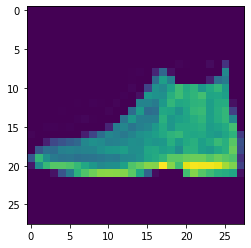

In [38]:

plt.imshow(test_images[0])
plt.show()